In [ ]:
#importing the necessary libraries
import torch
import pandas as pd
import re
import matplotlib.pyplot as plt


from torch.utils.data import TensorDataset

from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
!pip install transformers
from transformers import BertTokenizer
from transformers import BertForSequenceClassification


In [2]:
#importing the dataset into a DataFrame
df = pd.read_csv('mbti_1.csv')

In [3]:
#showing the first 5 rows of the dataset
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
#showing dataset infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [5]:
#showing the posts of the first user in the dataset
df.posts.values[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [6]:
#showing the number of users per personality type
df.type.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


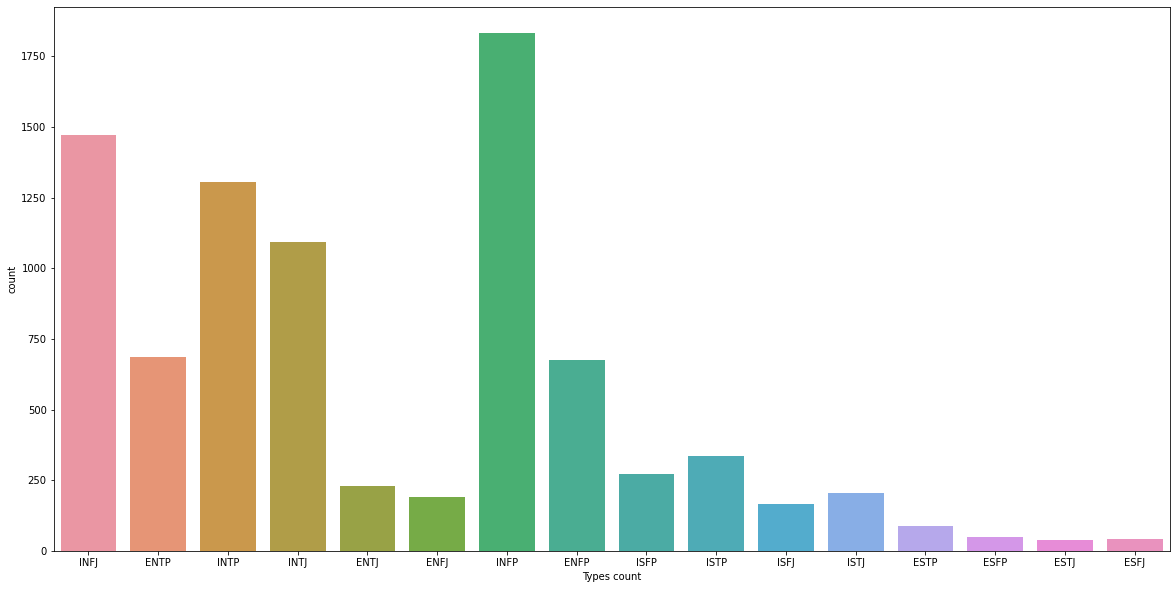

In [7]:
#visualizing the number of users per personality type using a histogram
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(df.type)
plt.xlabel('Types count');

In [8]:
#removing URLs and punctuation from dataset
for index in df.index.values:
  df.posts.iloc[index] = ' '.join(df.posts.iloc[index].split('|||'))
  df.posts.iloc[index] = re.sub(r"http\S+","",df.posts.iloc[index])
  df.posts.iloc[index] = re.sub(r"[-/@.?!_,:;()|0-9]","",df.posts.iloc[index])
  df.posts.iloc[index] = ' '.join(df.posts.iloc[index].split('  '))
df.head(10)

"""
saving the clean dataset into a csv file
df.to_csv('mbti_clean_dataset.csv',index=False)
"""

,type,posts
0,INFJ,' enfp and intj moments sportscenter not top ...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one Of course to which I say I know th...
3,INTJ,'Dear INTP I enjoyed our conversation the oth...
4,ENTJ,'You're fired That's another silly misconcepti...
5,INTJ,' Science is not perfect No scientist claims t...
6,INFJ,'No I can't draw on my own nails haha Those we...
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,I'm not sure that's a good question The distin...
9,INTP,' I'm in this position where I have to actuall...


In [9]:
#identifying the different classes of users in the dataset
labels = df.type.unique()
labels

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [10]:
#mapping personality types with their numberical representation
labels2 = []
label_rep = {}
for index,labels in enumerate(labels):
    label_rep[labels] = index
    labels2.append(labels)
labels2

['INFJ',
 'ENTP',
 'INTP',
 'INTJ',
 'ENTJ',
 'ENFJ',
 'INFP',
 'ENFP',
 'ISFP',
 'ISTP',
 'ISFJ',
 'ISTJ',
 'ESTP',
 'ESFP',
 'ESTJ',
 'ESFJ']

In [11]:
label_rep

{'ENFJ': 5,
 'ENFP': 7,
 'ENTJ': 4,
 'ENTP': 1,
 'ESFJ': 15,
 'ESFP': 13,
 'ESTJ': 14,
 'ESTP': 12,
 'INFJ': 0,
 'INFP': 6,
 'INTJ': 3,
 'INTP': 2,
 'ISFJ': 10,
 'ISFP': 8,
 'ISTJ': 11,
 'ISTP': 9}

In [12]:
#replacing each personality type with its numerical representation
df['label'] = df.type.replace(label_rep)
df.head(10)

,type,posts,label
0,INFJ,' enfp and intj moments sportscenter not top ...,0
1,ENTP,'I'm finding the lack of me in these posts ver...,1
2,INTP,'Good one Of course to which I say I know th...,2
3,INTJ,'Dear INTP I enjoyed our conversation the oth...,3
4,ENTJ,'You're fired That's another silly misconcepti...,4
5,INTJ,' Science is not perfect No scientist claims t...,3
6,INFJ,'No I can't draw on my own nails haha Those we...,0
7,INTJ,'I tend to build up a collection of things on ...,3
8,INFJ,I'm not sure that's a good question The distin...,0
9,INTP,' I'm in this position where I have to actuall...,2


In [13]:
#Splitting the dataset into training (85% of the data) and test (15% of the data) sets
x_train, x_test, y_train, y_test = train_test_split(df.index.values, df.label.values, test_size=0.15, random_state=17, stratify=df.label.values)

In [14]:
#creating a new column "data_type"
df['data_type'] = ['not_set']*df.shape[0]

In [15]:
#identifying the rows belonging to both training and test sets
df.loc[x_train,'data_type'] = 'train'
df.loc[x_test,'data_type'] = 'test'

In [16]:
df.head(10)

,type,posts,label,data_type
0,INFJ,' enfp and intj moments sportscenter not top ...,0,train
1,ENTP,'I'm finding the lack of me in these posts ver...,1,train
2,INTP,'Good one Of course to which I say I know th...,2,train
3,INTJ,'Dear INTP I enjoyed our conversation the oth...,3,train
4,ENTJ,'You're fired That's another silly misconcepti...,4,test
5,INTJ,' Science is not perfect No scientist claims t...,3,train
6,INFJ,'No I can't draw on my own nails haha Those we...,0,test
7,INTJ,'I tend to build up a collection of things on ...,3,test
8,INFJ,I'm not sure that's a good question The distin...,0,train
9,INTP,' I'm in this position where I have to actuall...,2,train


In [17]:
#showing the amount of data reserved for training and test per personality type
df.groupby(['type','label','data_type']).count()

posts
type label data_type       
ENFJ 5     test          28
           train        162
ENFP 7     test         101
           train        574
ENTJ 4     test          35
           train        196
ENTP 1     test         103
           train        582
ESFJ 15    test           6
           train         36
ESFP 13    test           7
           train         41
ESTJ 14    test           6
           train         33
ESTP 12    test          13
           train         76
INFJ 0     test         221
           train       1249
INFP 6     test         275
           train       1557
INTJ 3     test         164
           train        927
INTP 2     test         196
           train       1108
ISFJ 10    test          25
           train        141
ISFP 8     test          41
           train        230
ISTJ 11    test          31
           train        174
ISTP 9     test          50
           train        287

In [18]:
#creating a BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [20]:
#encoding the data using our tokenizer
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].posts.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    df[df.data_type=='test'].posts.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

In [21]:
#showing an example of data tokenized and encoded by BERT tokenizer
encoded_data_test

{'input_ids': tensor([[  101,  1005,  2017,  ...,  2026, 13148,   102],
        [  101,  1005,  2053,  ...,  2016,  2515,   102],
        [  101,  1005,  1045,  ...,  4426,  2079,   102],
        ...,
        [  101,  1005,  1045,  ..., 10047,  5457,   102],
        [  101,  1005,  2023,  ...,  3798,  1997,   102],
        [  101,  1005,  2009,  ...,  1055,  2035,   102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])}

In [22]:
#preparing inputs for BERT model
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

In [23]:
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(df[df.data_type=='test'].label.values)

In [24]:
dataset_train = TensorDataset(input_ids_train,attention_masks_train,labels_train)
dataset_test = TensorDataset(input_ids_test,attention_masks_test,labels_test)
len(dataset_train)

7373

In [25]:
#creating a BertForSequenceClassification model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_rep),
                                                      output_attentions=False,
                                                      output_hidden_states=False)



In [26]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [27]:
#Defining the batch size
batch_size = 32
#less for limited hardware ressources. Example : 4

In [28]:
#creating dataloader to load the data while training
dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_test = DataLoader(dataset_test, 
                                   sampler=SequentialSampler(dataset_test), 
                                   batch_size=batch_size)

In [29]:
from transformers import AdamW, get_linear_schedule_with_warmup

No handles with labels found to put in legend.


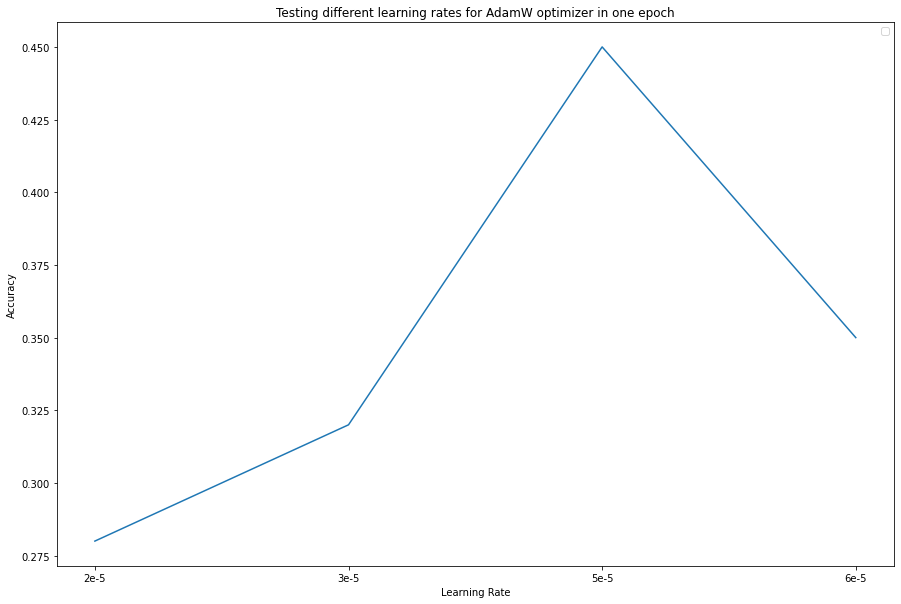

In [30]:
"""
Testing different learning rates for AdamW optimizer in one epoch
The following values of learning rates were tested on this code
Recommanded learning rate for BERT between 2e-5 and 5e-5
"""
learning_rate = ['2e-5','3e-5','5e-5','6e-5']
accuracy = [0.28,0.32,0.45,0.35]
plt.figure(figsize=(15,10))
plt.title('Testing different learning rates for AdamW optimizer in one epoch')
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.legend()
plt.plot(learning_rate,accuracy)

In [31]:
#creating an AdamW optimizer
optimizer = AdamW(model.parameters(),
                  lr=5e-5, 
                  eps=1e-8)
#recommanded epsilon : 1e-8

In [32]:
#Defining the number of epochs
epochs = 10

In [33]:
#creating a scheduler to update the learning rate while training
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0.1,
                                            num_training_steps=len(dataloader_train)*epochs)

In [34]:
import numpy as np

In [35]:
from sklearn.metrics import f1_score

In [37]:
#Defining the global accuracy function
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [38]:
#Defining the accuracy per class function
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_rep.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')
    return preds_flat, labels_flat

In [39]:
#Defining the device on which we're going to run the code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [40]:
#Defining the evaluation function to get predictions and true types
def evaluate(dataloader_test):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_test:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_test) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
#Training 

import random
seed_value = 17
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)
f1_score_history = []
f1_score_train_history = []
train_loss_history = []
train_test_history = []

for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_test)
    tr_loss, predictions_train, true_vals_train = evaluate(dataloader_train)
    val_f1 = f1_score_func(predictions, true_vals)
    tr_f1 = f1_score_func(predictions_train, true_vals_train)
    f1_score_history.append(val_f1)
    f1_score_train_history.append(tr_f1)
    tqdm.write(f'Test loss: {val_loss}')
    train_test_history.append(val_loss)
    tqdm.write(f'F1 Score test (Weighted): {val_f1}')


Epoch 1
Training loss: 2.0688837075130246
Test loss: 1.7883009241848458
F1 Score (Weighted): 0.4286282476007504



Epoch 2
Training loss: 1.617831041286518
Test loss: 1.5653505005487582
F1 Score (Weighted): 0.5103480190822232



Epoch 3
Training loss: 1.286478349398741
Test loss: 1.6269895129087495
F1 Score (Weighted): 0.5080979182526982



Epoch 4
Training loss: 0.9797707001368204
Test loss: 1.6999986549703086
F1 Score (Weighted): 0.5223945909537996



Epoch 5
Training loss: 0.6720608310911046
Test loss: 1.9276001453399658
F1 Score (Weighted): 0.4980500266574749



Epoch 6
Training loss: 0.4465039252460777
Test loss: 2.054774586747332
F1 Score (Weighted): 0.5042282812251806



Epoch 7
Training loss: 0.30711663553080004
Test loss: 2.2394956117723046
F1 Score (Weighted): 0.4906617941605253



Epoch 8
Training loss: 0.20699453421614386
Test loss: 2.387341641798252
F1 Score (Weighted): 0.49181760378450684



Epoch 9
Training loss: 0.13895735022051509
Test loss: 2.4679925761571746
F1 Score (Weighted): 0.5094793188183633



Epoch 10
Training loss: 0.10729642118855472
Test loss: 2.4919467873689607
F1 Score (Weighted): 0.5072270427770138



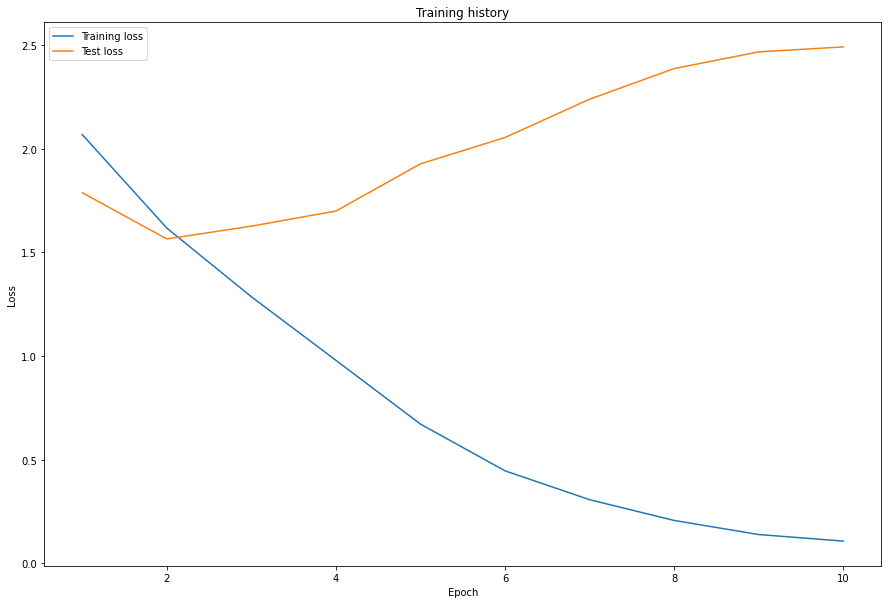

In [ ]:
#Plotting the training and test accuracy per epoch

plt.figure(figsize=(15,10))
plt.plot(range(1,epochs+1),f1_score_train_history,label='Training loss')
plt.plot(range(1,epochs+1),f1_score_history,label='Test loss')
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()


In [41]:
#creating a BertForSequenceClassification model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_rep),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [42]:
#Loading the model we saved in a file
model.load_state_dict(torch.load('finetuned_BERT_epoch_4.model', map_location=torch.device('cuda')))

<All keys matched successfully>

In [43]:
#Getting the predictions and the types of the users in the test set
_, predictions, true_vals = evaluate(dataloader_test)

In [44]:
#Getting the accuracy per class of each personality type
y_preds, y_true = accuracy_per_class(predictions, true_vals)

Class: INFJ
Accuracy: 111/221

Class: ENTP
Accuracy: 43/103

Class: INTP
Accuracy: 116/196

Class: INTJ
Accuracy: 95/164

Class: ENTJ
Accuracy: 18/35

Class: ENFJ
Accuracy: 12/28

Class: INFP
Accuracy: 175/275

Class: ENFP
Accuracy: 50/101

Class: ISFP
Accuracy: 16/41

Class: ISTP
Accuracy: 20/50

Class: ISFJ
Accuracy: 13/25

Class: ISTJ
Accuracy: 13/31

Class: ESTP
Accuracy: 3/13

Class: ESFP
Accuracy: 0/7

Class: ESTJ
Accuracy: 0/6

Class: ESFJ
Accuracy: 1/6



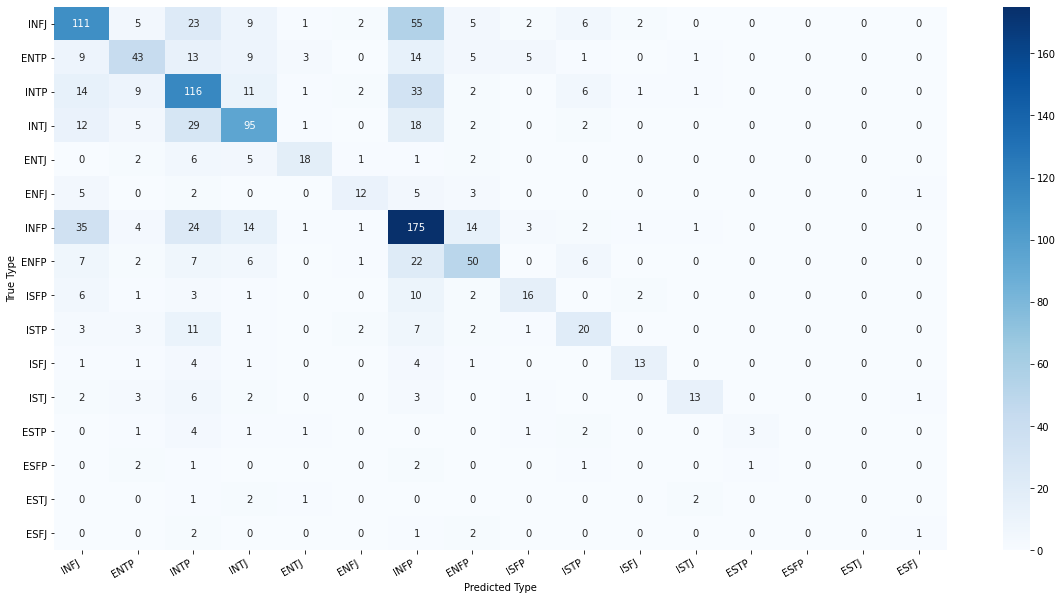

In [45]:
#Plotting the confusion matrix in order to identifiy the misclassified types
from sklearn import metrics
def show_confusion_matrix(confusion_matrix):
  plt.figure(figsize=(20,10))
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True Type')
  plt.xlabel('Predicted Type');

cm = metrics.confusion_matrix(y_true, y_preds)
df_cm = pd.DataFrame(cm, index=labels2, columns=labels2)
show_confusion_matrix(df_cm)

In [59]:
"""
In the next step, we're going to try to understand the reason why certain personality types are being misclassified.
We're gonna use INFP and INFJ personality types as an example.
We're going to identify the vocabulary used in commun between these two types and calculate its percentage
"""
infj = df[df.type=='INFJ'].posts.values

In [47]:
infp = df[df.type=='INFP'].posts.values

In [48]:
infj_tokens = []
for post in infj:
  tokens = tokenizer.tokenize(post)
  infj_tokens = infj_tokens + tokens
infj_tokens = list(set(infj_tokens))
len(infj_tokens)

20629

In [49]:
infp_tokens = []
for post in infp:
  tokens = tokenizer.tokenize(post)
  infp_tokens = infp_tokens + tokens
infp_tokens = list(set(infp_tokens))
len(infp_tokens)

21417

In [50]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [51]:
inter = intersection(infj_tokens,infp_tokens)

In [52]:
len(inter)/len(infp_tokens)*100

88.691226595695

In [53]:
len(inter)/len(infj_tokens)*100

92.07911192980755

The results obtained are realistic, since INFPs and INFJs share many personality traits according to psychologists.

In [54]:
#Identifying the missclassifications in each personaity trait
def translate(list1 , list2):
  lst=[]
  for x in list1:
    if x in list2:
      lst.append(0)
    else:
      lst.append(1)
  return(lst)
y_true_ie=translate(y_true,[0,6,3,2,10,8,11,9])
y_preds_ie=translate(y_preds,[0,6,3,2,10,8,11,9])
  
y_true_sn=translate(y_true,[15,13,14,12,10,8,11,9])
y_preds_sn=translate(y_preds,[15,13,14,12,10,8,11,9])

y_true_tf=translate(y_true,[4,1,14,12,3,2,11,9])
y_preds_tf=translate(y_preds,[4,1,14,12,3,2,11,9])

y_true_jp=translate(y_true,[5,4,15,14,0,3,10,11])
y_preds_jp=translate(y_preds,[5,4,15,14,0,3,10,11])

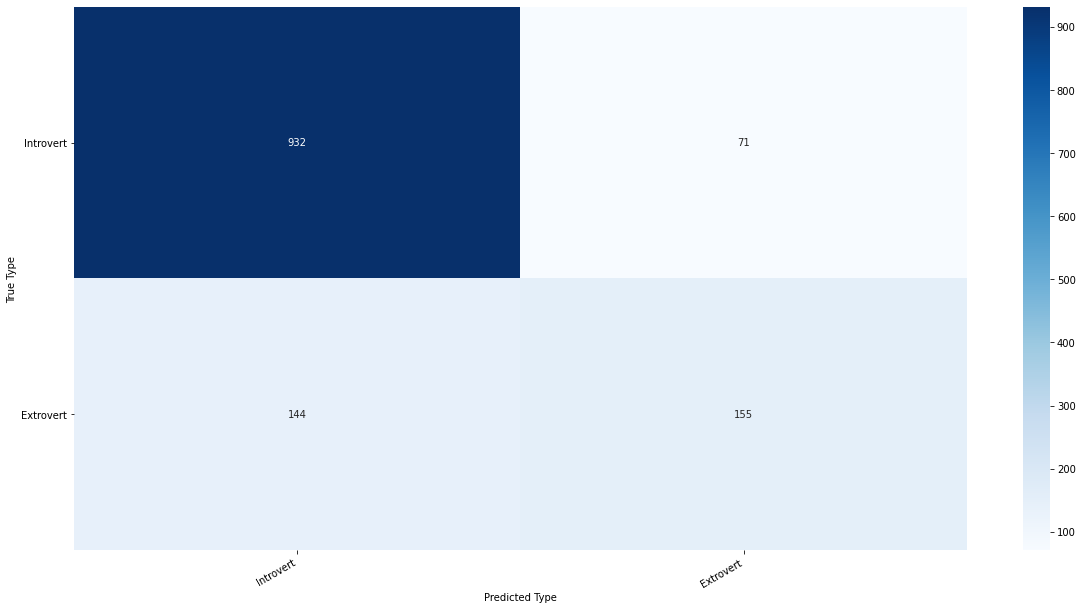

In [55]:
#Plotting the confusion matrix for Introverts vs Extroverts
cm = metrics.confusion_matrix(y_true_ie, y_preds_ie)
df_cm = pd.DataFrame(cm, index=['Introvert','Extrovert'], columns=['Introvert','Extrovert'])
show_confusion_matrix(df_cm)

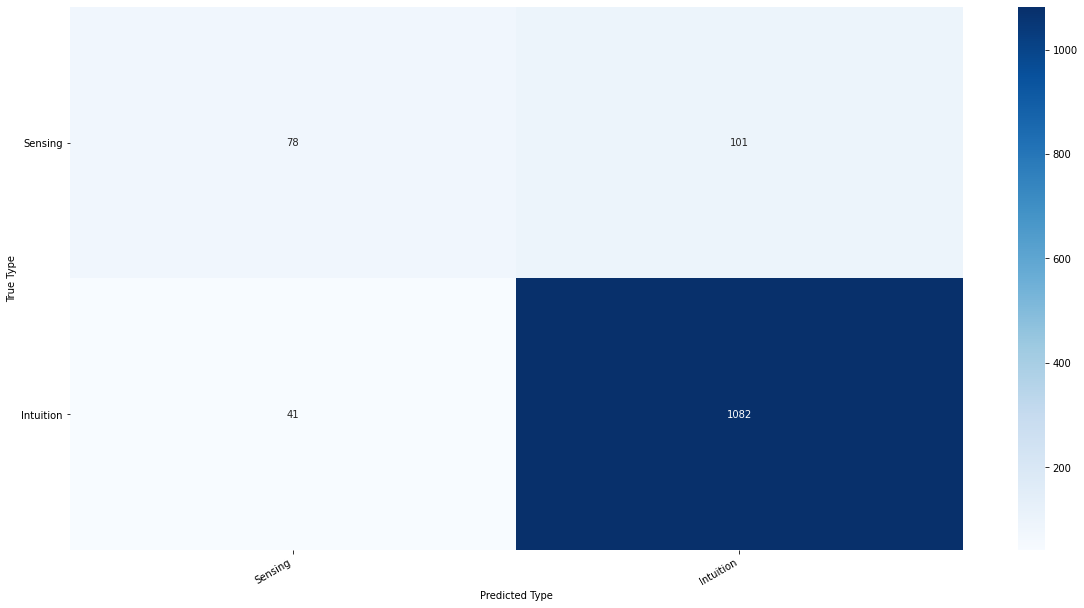

In [56]:
#Plotting the confusion matrix for Sensing vs Intuitive
cm = metrics.confusion_matrix(y_true_sn, y_preds_sn)
df_cm = pd.DataFrame(cm, index=['Sensing','Intuition'], columns=['Sensing','Intuition'])
show_confusion_matrix(df_cm)

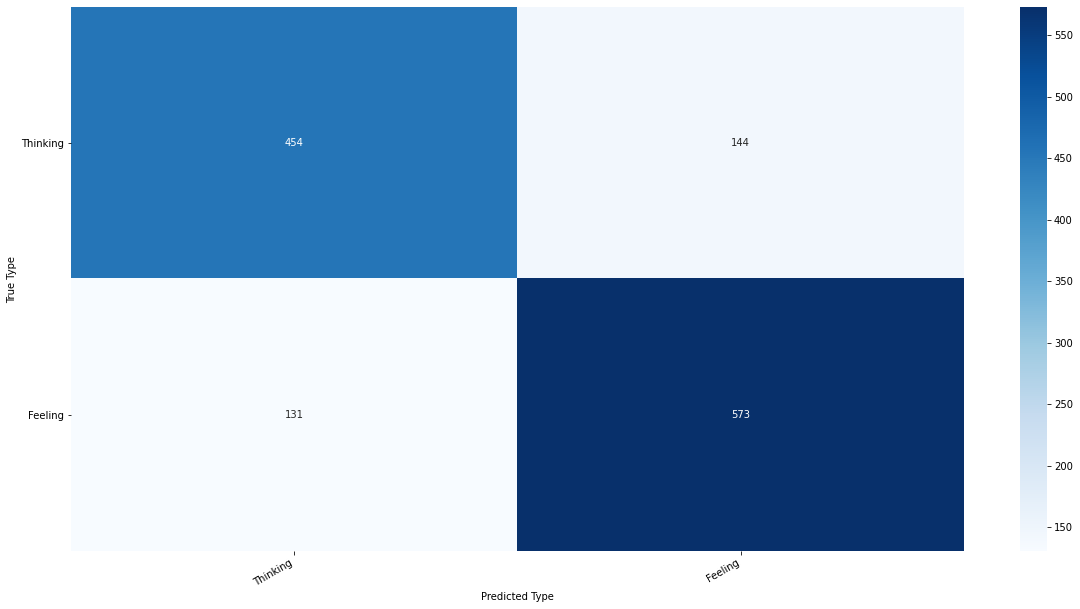

In [57]:
#Plotting the confusion matrix for Thinking vs Feeling
cm = metrics.confusion_matrix(y_true_tf, y_preds_tf)
df_cm = pd.DataFrame(cm, index=['Thinking','Feeling'], columns=['Thinking','Feeling'])
show_confusion_matrix(df_cm)

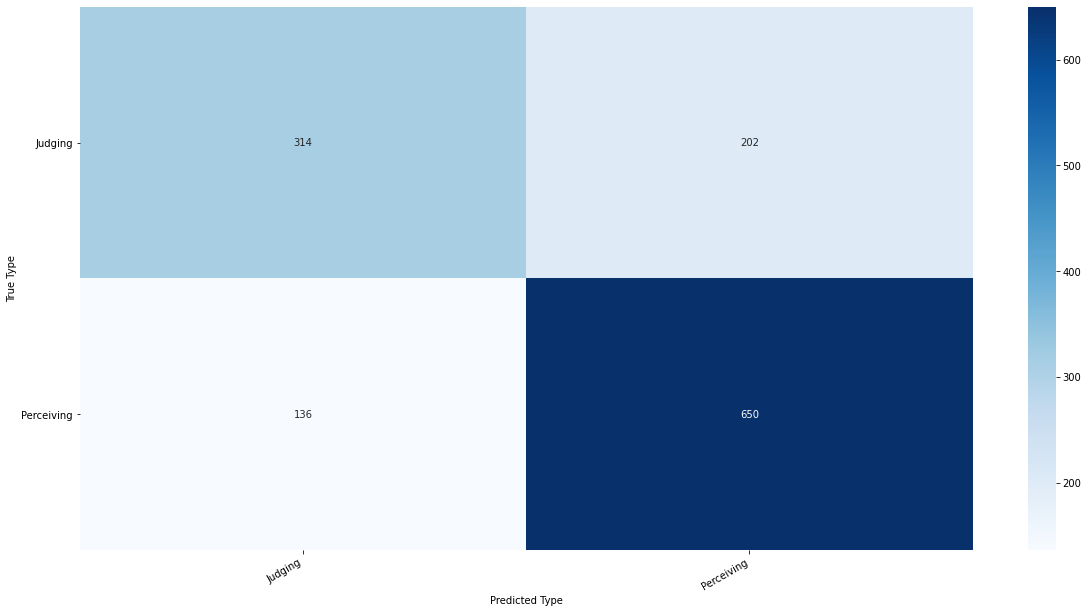

In [58]:
#Plotting the confusion matrix for Judging vs Perceiving
cm = metrics.confusion_matrix(y_true_jp, y_preds_jp)
df_cm = pd.DataFrame(cm, index=['Judging','Perceiving'], columns=['Judging','Perceiving'])
show_confusion_matrix(df_cm)
